# DATASETS (more or less ito gagamitin)
1. geoportal_doh_poi_health.csv - DOH health facilities from the GeoPortal platform
2. osm_poi_health.csv - OpenStreetMap (OSM) health facilities available for each barangay
3. mapbox_health_facility_brgy_isochrones.csv - % accessible barangay population within a 5-30 minutes travel time from nearest health facility based on the Mapbox Isochrones API
4. worldpop_population.csv - gridded barangay population estimates from WorldPop
5. disease_lgu_disaggregated_totals.csv - baranggay-level age and sex-disaggregated disease deaths (mortality) and cases (morbidity) from reports submitted by the LGU to DOH-Field Health Services Information System (DOH-FHSIS) or Department of Health- Philippine Integrated Disease Surveillance and Response (DOH-PISDR)

link: https://data.humdata.org/dataset/project-cchain

6. phl_admbnda_adm4_psa_namria_20231106.shp - administrative boundaries in the Philippines at the barangay level

link: https://data.humdata.org/dataset/cod-ab-phl

In [ ]:
pip install matplotlib

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Setting Global File Path

## define global file path
file_path = "/content"
### Riane - "C://Users//riane//Downloads//02_GitHub//econ138-capstone"
### Blaine - ""
### Carlos - "/content" #### Carlos uses Colab

## define a global data path
data_path = file_path + "//01_Datasets"

In [ ]:
# Loading Datasets

## DOH health facilities
brgy_hfacilities_doh = pd.read_csv(data_path + "//geoportal_doh_poi_health.csv")

## OSM health facilities
brgy_hfacilities_osm = pd.read_csv(data_path + "//osm_poi_health.csv")

## population density in barangays
population_density = pd.read_csv(data_path + "//worldpop_population.csv")

## mortality + morbidity in baranagays
mortality_morbidity = pd.read_csv(data_path + "//disease_lgu_disaggregated_totals.csv")

## barangay administrative boundaries
ph_brgy_shp = gpd.read_file(data_path + "//Barangays//Barangays.shp")

## INSPECT DATA

### Health Facilities (DOH)

In [ ]:
# Inspecting brgy_hfacilities_doh data

## Check for shape
brgy_hfacilities_doh.shape

(879, 21)

In [ ]:
# Inspecting brgy_hfacilities_doh data

## Check info
brgy_hfacilities_doh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   uuid                                                    879 non-null    object 
 1   adm4_pcode                                              879 non-null    object 
 2   date                                                    879 non-null    object 
 3   freq                                                    879 non-null    object 
 4   doh_pois_count                                          879 non-null    float64
 5   doh_brgy_health_station_count                           879 non-null    float64
 6   doh_brgy_health_station_nearest                         879 non-null    float64
 7   doh_rural_health_unit_count                             879 non-null    float64
 8   doh_rural_health_unit_nearest           

In [ ]:
# Inspecting brgy_hfacilities_doh data

## Check for head
brgy_hfacilities_doh.head()

,uuid,adm4_pcode,date,freq,doh_pois_count,doh_brgy_health_station_count,doh_brgy_health_station_nearest,doh_rural_health_unit_count,doh_rural_health_unit_nearest,doh_hospital_count,...,doh_birthing_home_lying_in_clinic_count,doh_birthing_home_lying_in_clinic_nearest,doh_infirmary_count,doh_infirmary_nearest,doh_drug_abuse_treatment_rehabilitation_center_count,doh_drug_abuse_treatment_rehabilitation_center_nearest,doh_social_hygiene_clinic_count,doh_social_hygiene_clinic_nearest,doh_medical_clinic_count,doh_medical_clinic_nearest
0,GPDPH000000,PH015518016,2013-01-01,S,0.0,0.0,57.207979,0.0,2223.053002,0.0,...,0.0,1374.683230,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0
1,GPDPH000001,PH015518031,2013-01-01,S,3.0,0.0,315.326271,0.0,956.852487,3.0,...,0.0,360.111127,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0
2,GPDPH000002,PH015518022,2013-01-01,S,4.0,1.0,0.000000,0.0,525.943025,2.0,...,1.0,0.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0
3,GPDPH000003,PH015518024,2013-01-01,S,0.0,0.0,26.057052,0.0,470.836570,0.0,...,0.0,1234.886976,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0
4,GPDPH000004,PH034919017,2013-01-01,S,0.0,0.0,1461.018896,0.0,1184.233554,0.0,...,0.0,10000.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.0


In [ ]:
# Dropping columns (uuid, date, freq)
brgy_hfacilities_doh = brgy_hfacilities_doh.drop(columns = ['date', 'freq', 'uuid'])

## Preview dataset
brgy_hfacilities_doh

,adm4_pcode,doh_pois_count,doh_brgy_health_station_count,doh_brgy_health_station_nearest,doh_rural_health_unit_count,doh_rural_health_unit_nearest,doh_hospital_count,doh_hospital_nearest,doh_birthing_home_lying_in_clinic_count,doh_birthing_home_lying_in_clinic_nearest,doh_infirmary_count,doh_infirmary_nearest,doh_drug_abuse_treatment_rehabilitation_center_count,doh_drug_abuse_treatment_rehabilitation_center_nearest,doh_social_hygiene_clinic_count,doh_social_hygiene_clinic_nearest,doh_medical_clinic_count,doh_medical_clinic_nearest
0,PH015518016,0.0,0.0,57.207979,0.0,2223.053002,0.0,1284.283872,0.0,1374.683230,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
1,PH015518031,3.0,0.0,315.326271,0.0,956.852487,3.0,0.000000,0.0,360.111127,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
2,PH015518022,4.0,1.0,0.000000,0.0,525.943025,2.0,0.000000,1.0,0.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
3,PH015518024,0.0,0.0,26.057052,0.0,470.836570,0.0,61.589973,0.0,1234.886976,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
4,PH034919017,0.0,0.0,1461.018896,0.0,1184.233554,0.0,10000.000000,0.0,10000.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,PH137401018,1.0,0.0,403.548006,1.0,0.000000,0.0,362.521353,0.0,9812.208969,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,888.672382
875,PH137401022,7.0,1.0,0.000000,2.0,0.000000,3.0,0.000000,0.0,10000.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,1.0,0.000000
876,PH137503007,0.0,0.0,1439.449103,0.0,21.304852,0.0,560.834949,0.0,888.359157,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000
877,PH137503014,2.0,0.0,3531.672618,1.0,0.000000,0.0,1390.279229,1.0,0.000000,0.0,10000.0,0.0,10000.0,0.0,10000.0,0.0,10000.000000


### Health Facilities (OSM)

In [ ]:
# Inspecting brgy_hfacilities_osm data

## Check for shape
brgy_hfacilities_osm.shape

(7911, 16)

In [ ]:
# Inspecting brgy_hfacilities_osm data

## Check info
brgy_hfacilities_osm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7911 entries, 0 to 7910
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uuid              7911 non-null   object 
 1   adm4_pcode        7911 non-null   object 
 2   date              7911 non-null   object 
 3   freq              7911 non-null   object 
 4   clinic_count      7911 non-null   float64
 5   clinic_nearest    7911 non-null   float64
 6   dentist_count     7911 non-null   float64
 7   dentist_nearest   7911 non-null   float64
 8   doctors_count     7911 non-null   float64
 9   doctors_nearest   7911 non-null   float64
 10  hospital_count    7911 non-null   float64
 11  hospital_nearest  7911 non-null   float64
 12  optician_count    7911 non-null   float64
 13  optician_nearest  7911 non-null   float64
 14  pharmacy_count    7911 non-null   float64
 15  pharmacy_nearest  7911 non-null   float64
dtypes: float64(12), object(4)
memory usage: 98

In [ ]:
# Inspecting brgy_hfacilities_osm data

## Check for head
brgy_hfacilities_osm.head()

,uuid,adm4_pcode,date,freq,clinic_count,clinic_nearest,dentist_count,dentist_nearest,doctors_count,doctors_nearest,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest
0,OSMPH000000,PH015518016,2018-01-01,Y,0.0,10000.0,0.0,1769.374267,0.0,10000.0,0.0,1287.610535,0.0,1641.869235,0.0,1041.414528
1,OSMPH000001,PH015518031,2018-01-01,Y,0.0,10000.0,1.0,0.000000,0.0,10000.0,2.0,0.000000,0.0,119.946141,5.0,0.000000
2,OSMPH000002,PH015518022,2018-01-01,Y,0.0,10000.0,0.0,16.499396,0.0,10000.0,0.0,18.137222,0.0,485.692845,15.0,0.000000
3,OSMPH000003,PH015518024,2018-01-01,Y,0.0,10000.0,0.0,242.770779,0.0,10000.0,0.0,317.053145,0.0,222.414184,4.0,0.000000
4,OSMPH000004,PH034919017,2018-01-01,Y,0.0,10000.0,0.0,10000.000000,0.0,10000.0,0.0,10000.000000,0.0,10000.000000,0.0,10000.000000


In [ ]:
# Dropping columns (uuid, date, freq, optician_count, optician_nearest)
brgy_hfacilities_osm = brgy_hfacilities_osm.drop(columns = ['date', 'freq', 'uuid', 'optician_count', 'optician_nearest'])

## Preview dataset
brgy_hfacilities_osm

,adm4_pcode,clinic_count,clinic_nearest,dentist_count,dentist_nearest,doctors_count,doctors_nearest,hospital_count,hospital_nearest,pharmacy_count,pharmacy_nearest
0,PH015518016,0.0,10000.0,0.0,1769.374267,0.0,10000.000000,0.0,1287.610535,0.0,1041.414528
1,PH015518031,0.0,10000.0,1.0,0.000000,0.0,10000.000000,2.0,0.000000,5.0,0.000000
2,PH015518022,0.0,10000.0,0.0,16.499396,0.0,10000.000000,0.0,18.137222,15.0,0.000000
3,PH015518024,0.0,10000.0,0.0,242.770779,0.0,10000.000000,0.0,317.053145,4.0,0.000000
4,PH034919017,0.0,10000.0,0.0,10000.000000,0.0,10000.000000,0.0,10000.000000,0.0,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...
7906,PH137401018,0.0,10000.0,0.0,411.027351,0.0,134.783556,0.0,1041.680623,0.0,289.248776
7907,PH137401022,0.0,10000.0,0.0,237.275571,0.0,209.112357,1.0,0.000000,5.0,0.000000
7908,PH137503007,0.0,10000.0,0.0,10000.000000,0.0,10000.000000,0.0,542.511244,0.0,794.129508
7909,PH137503014,0.0,10000.0,0.0,10000.000000,0.0,10000.000000,0.0,1398.114245,0.0,418.911431


In [ ]:
# Inspecting population_density data

## Check info
population_density.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18459 entries, 0 to 18458
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                18459 non-null  object 
 1   adm4_pcode          18459 non-null  object 
 2   date                18459 non-null  object 
 3   freq                18459 non-null  object 
 4   pop_count_total     18438 non-null  float64
 5   pop_count_mean      18438 non-null  float64
 6   pop_count_median    18438 non-null  float64
 7   pop_count_stdev     18438 non-null  float64
 8   pop_count_min       18438 non-null  float64
 9   pop_count_max       18438 non-null  float64
 10  pop_density_mean    10668 non-null  float64
 11  pop_density_median  10668 non-null  float64
 12  pop_density_stdev   10668 non-null  float64
 13  pop_density_min     10668 non-null  float64
 14  pop_density_max     10668 non-null  float64
dtypes: float64(11), object(4)
memory usage: 2.1+ MB


In [ ]:
population_density.isnull().value_counts()

uuid   adm4_pcode  date   freq   pop_count_total  pop_count_mean  pop_count_median  pop_count_stdev  pop_count_min  pop_count_max  pop_density_mean  pop_density_median  pop_density_stdev  pop_density_min  pop_density_max
False  False       False  False  False            False           False             False            False          False          False             False               False              False            False              10668
                                                                                                                                   True              True                True               True             True                7770
                                 True             True            True              True             True           True           True              True                True               True             True                  21
Name: count, dtype: int64

In [ ]:
# Inspecting population_density data

## Check for head
population_density.head()

,uuid,adm4_pcode,date,freq,pop_count_total,pop_count_mean,pop_count_median,pop_count_stdev,pop_count_min,pop_count_max,pop_density_mean,pop_density_median,pop_density_stdev,pop_density_min,pop_density_max
0,WDPOP000000,PH137503007,2000-01-01,Y,3350.263672,558.377279,545.798828,48.654772,516.175537,661.617249,NaN,NaN,NaN,NaN,NaN
1,WDPOP000001,PH063022152,2000-01-01,Y,1492.030518,14.346447,14.088117,9.941083,1.157729,39.577888,1747.875977,1747.875977,0.0,1747.875977,1747.875977
2,WDPOP000002,PH063022015,2000-01-01,Y,688.092651,45.872843,46.660271,6.994909,30.479767,55.304688,NaN,NaN,NaN,NaN,NaN
3,WDPOP000003,PH063022118,2000-01-01,Y,1734.744507,133.441885,18.758980,247.449747,11.151038,968.687927,NaN,NaN,NaN,NaN,NaN
4,WDPOP000004,PH050506019,2000-01-01,Y,268.516998,29.835222,21.024340,20.024697,14.085201,67.157532,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Inspecting mortality_morbidity data

## Check for shape
mortality_morbidity.shape

## Check info
mortality_morbidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48735 entries, 0 to 48734
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uuid                 48735 non-null  object 
 1   freq                 48735 non-null  object 
 2   date                 48735 non-null  object 
 3   source_name          48735 non-null  object 
 4   source_filename      48735 non-null  object 
 5   adm3_pcode           48735 non-null  object 
 6   adm4_pcode           47218 non-null  object 
 7   disease_icd10_code   48735 non-null  object 
 8   disease_common_name  48735 non-null  object 
 9   sex                  48734 non-null  object 
 10  age_group            48735 non-null  object 
 11  case_total           48735 non-null  int64  
 12  death_total          31860 non-null  float64
dtypes: float64(1), int64(1), object(11)
memory usage: 4.8+ MB


In [ ]:
# Inspecting mortality_morbidity data

## Check for head
mortality_morbidity.head()

,uuid,freq,date,source_name,source_filename,adm3_pcode,adm4_pcode,disease_icd10_code,disease_common_name,sex,age_group,case_total,death_total
0,DLGUT000000,M,2022-01-01,FHSIS-LGU-DISAGG,CdO_2022_Morbidity,PH104305000,NaN,A01,TYPHOID FEVER,F,50-59,0,NaN
1,DLGUT000001,M,2022-01-01,FHSIS-LGU-DISAGG,CdO_2022_Morbidity,PH104305000,NaN,A01,TYPHOID FEVER,M,50-59,1,NaN
2,DLGUT000002,M,2022-02-01,FHSIS-LGU-DISAGG,CdO_2022_Morbidity,PH104305000,NaN,A01,TYPHOID FEVER,F,10-19,0,NaN
3,DLGUT000003,M,2022-02-01,FHSIS-LGU-DISAGG,CdO_2022_Morbidity,PH104305000,NaN,A01,TYPHOID FEVER,M,10-19,1,NaN
4,DLGUT000004,M,2022-02-01,FHSIS-LGU-DISAGG,CdO_2022_Morbidity,PH104305000,NaN,A01,TYPHOID FEVER,F,20-29,0,NaN


### Barangay Shapefile

In [ ]:
# Inspecting ph_brgy_shp data

## Check info
ph_brgy_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42058 entries, 0 to 42057
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM1_PCODE  42058 non-null  object  
 1   ADM1_EN     42058 non-null  object  
 2   ADM2_PCODE  42058 non-null  object  
 3   ADM2_EN     42058 non-null  object  
 4   ADM3_PCODE  42058 non-null  object  
 5   ADM3_EN     42058 non-null  object  
 6   ADM4_PCODE  42036 non-null  object  
 7   ADM4_EN     42058 non-null  object  
 8   geometry    42058 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 2.9+ MB


In [ ]:
# Inspecting ph_brgy_shp data

## Check for head
ph_brgy_shp.head()

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry
0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502012,Pogomboa,"POLYGON ((120.25441 15.88112, 120.24723 15.878..."
1,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502013,Pogonsili,"POLYGON ((120.26372 15.81724, 120.25821 15.811..."
2,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502014,San Jose,"POLYGON ((120.28018 15.87048, 120.27885 15.870..."
3,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502016,Tampac,"POLYGON ((120.26163 15.876, 120.26149 15.87597..."
4,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502017,Laoag,"POLYGON ((120.221 15.88999, 120.22163 15.88672..."


# GEOSPATIAL MAPPING
Use graduated symbols to map health facilities count by type. Each type is differentiated by color while the count is represented by the symbol size.

### Graduated Symbol of Facility Counts

In [ ]:
# Filtering columns w/ "_count" + adm4_pcode

## DOH
doh_count = brgy_hfacilities_doh.filter(like='_count')
doh_count.insert(0, 'adm4_pcode', brgy_hfacilities_doh['adm4_pcode'])

## OSM
osm_count = brgy_hfacilities_osm.filter(like='_count')
osm_count.insert(0, 'adm4_pcode', brgy_hfacilities_osm['adm4_pcode'])

In [ ]:
## View datasets
doh_count

,adm4_pcode,doh_pois_count,doh_brgy_health_station_count,doh_rural_health_unit_count,doh_hospital_count,doh_birthing_home_lying_in_clinic_count,doh_infirmary_count,doh_drug_abuse_treatment_rehabilitation_center_count,doh_social_hygiene_clinic_count,doh_medical_clinic_count
0,PH015518016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PH015518031,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,PH015518022,4.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
3,PH015518024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PH034919017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
874,PH137401018,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
875,PH137401022,7.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0
876,PH137503007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877,PH137503014,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
## View datasets
osm_count

,adm4_pcode,clinic_count,dentist_count,doctors_count,hospital_count,pharmacy_count
0,PH015518016,0.0,0.0,0.0,0.0,0.0
1,PH015518031,0.0,1.0,0.0,2.0,5.0
2,PH015518022,0.0,0.0,0.0,0.0,15.0
3,PH015518024,0.0,0.0,0.0,0.0,4.0
4,PH034919017,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
7906,PH137401018,0.0,0.0,0.0,0.0,0.0
7907,PH137401022,0.0,0.0,0.0,1.0,5.0
7908,PH137503007,0.0,0.0,0.0,0.0,0.0
7909,PH137503014,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Merging DOH data to OSM

##  Keep all brgy from OSM and bring in DOH data where available
merged_count = pd.merge(osm_count, doh_count, on='adm4_pcode', how='left')

In [ ]:
merged_count.describe()

,clinic_count,dentist_count,doctors_count,hospital_count,pharmacy_count,doh_pois_count,doh_brgy_health_station_count,doh_rural_health_unit_count,doh_hospital_count,doh_birthing_home_lying_in_clinic_count,doh_infirmary_count,doh_drug_abuse_treatment_rehabilitation_center_count,doh_social_hygiene_clinic_count,doh_medical_clinic_count
count,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000,7911.000000
mean,0.001770,0.047655,0.060549,0.139047,0.432689,0.827076,0.474403,0.135381,0.125142,0.077361,0.004551,0.001138,0.003413,0.005688
std,0.042033,0.280652,0.299177,0.938639,1.263006,1.035125,0.565615,0.411590,0.450328,0.321315,0.067309,0.033712,0.058325,0.089063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,5.000000,32.000000,16.000000,8.000000,3.000000,4.000000,5.000000,4.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
# Merging counts w/ shp

ph_brgy_shp['ADM4_PCODE'] = ph_brgy_shp['ADM4_PCODE'].str.strip().str.upper()
merged_count['adm4_pcode'] = merged_count['adm4_pcode'].str.strip().str.upper()

map_count = ph_brgy_shp.merge(merged_count, how='left', left_on='ADM4_PCODE', right_on='adm4_pcode')

## Preview
map_count

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry,adm4_pcode,...,pharmacy_count,doh_pois_count,doh_brgy_health_station_count,doh_rural_health_unit_count,doh_hospital_count,doh_birthing_home_lying_in_clinic_count,doh_infirmary_count,doh_drug_abuse_treatment_rehabilitation_center_count,doh_social_hygiene_clinic_count,doh_medical_clinic_count
0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502012,Pogomboa,"POLYGON ((120.25441 15.88112, 120.24723 15.878...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502013,Pogonsili,"POLYGON ((120.26372 15.81724, 120.25821 15.811...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502014,San Jose,"POLYGON ((120.28018 15.87048, 120.27885 15.870...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502016,Tampac,"POLYGON ((120.26163 15.876, 120.26149 15.87597...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502017,Laoag,"POLYGON ((120.221 15.88999, 120.22163 15.88672...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49053,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184528000,CITY OF TALISAY,PH184528030,San Fernando,"POLYGON ((123.06 10.72726, 123.06032 10.72714,...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49054,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184529000,TOBOSO,PH184529003,General Luna,"MULTIPOLYGON (((123.50895 10.70833, 123.5092 1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49055,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184529000,TOBOSO,PH184529005,Poblacion,"MULTIPOLYGON (((123.51869 10.72663, 123.51888 ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49056,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184530000,VALLADOLID,PH184530013,Palaka,"POLYGON ((122.83312 10.48849, 122.83402 10.488...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Replacing NaN w/ 0
map_count.fillna(0, inplace=True)

## Preview
map_count

,ADM1_PCODE,ADM1_EN,ADM2_PCODE,ADM2_EN,ADM3_PCODE,ADM3_EN,ADM4_PCODE,ADM4_EN,geometry,adm4_pcode,...,pharmacy_count,doh_pois_count,doh_brgy_health_station_count,doh_rural_health_unit_count,doh_hospital_count,doh_birthing_home_lying_in_clinic_count,doh_infirmary_count,doh_drug_abuse_treatment_rehabilitation_center_count,doh_social_hygiene_clinic_count,doh_medical_clinic_count
0,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502012,Pogomboa,"POLYGON ((120.25441 15.88112, 120.24723 15.878...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502013,Pogonsili,"POLYGON ((120.26372 15.81724, 120.25821 15.811...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502014,San Jose,"POLYGON ((120.28018 15.87048, 120.27885 15.870...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502016,Tampac,"POLYGON ((120.26163 15.876, 120.26149 15.87597...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PH010000000,REGION I (ILOCOS REGION),PH015500000,PANGASINAN,PH015502000,AGUILAR,PH015502017,Laoag,"POLYGON ((120.221 15.88999, 120.22163 15.88672...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49053,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184528000,CITY OF TALISAY,PH184528030,San Fernando,"POLYGON ((123.06 10.72726, 123.06032 10.72714,...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49054,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184529000,TOBOSO,PH184529003,General Luna,"MULTIPOLYGON (((123.50895 10.70833, 123.5092 1...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49055,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184529000,TOBOSO,PH184529005,Poblacion,"MULTIPOLYGON (((123.51869 10.72663, 123.51888 ...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49056,PH180000000,NEGROS ISLAND REGION (NIR),PH184500000,NEGROS OCCIDENTAL,PH184530000,VALLADOLID,PH184530013,Palaka,"POLYGON ((122.83312 10.48849, 122.83402 10.488...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


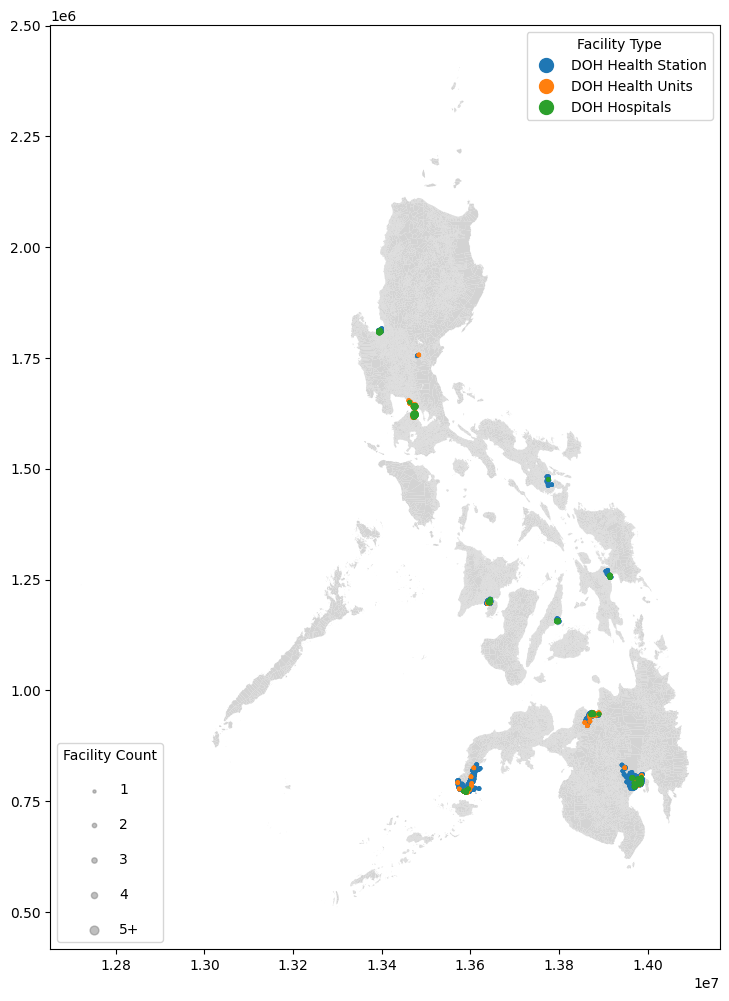

In [ ]:
map_count_proj = map_count.to_crs(epsg=3857)
centroids = map_count_proj.geometry.centroid

fig, ax = plt.subplots(figsize=(15, 12))

# Base map
map_count_proj.plot(ax=ax, edgecolor='none', facecolor='lightgray')

## DOH health stations
sizes_health = map_count_proj['doh_brgy_health_station_count'] * 5
ax.scatter(
    centroids.x,
    centroids.y,
    s=sizes_health,
    color='#1f77b4',
    alpha=0.5,
    label='DOH Health Station',
    marker='o'
)

## DOH health units
sizes_unit = map_count_proj['doh_rural_health_unit_count'] * 5
ax.scatter(
    centroids.x,
    centroids.y,
    s=sizes_unit,
    color='#ff7f0e',
    alpha=0.5,
    label='DOH Health Units',
    marker='o'
)

## DOH hospitals
sizes = map_count_proj['doh_hospital_count'] * 5  # Increase if needed
ax.scatter(
    centroids.x,
    centroids.y,
    s=sizes,
    color='#2ca02c',
    alpha=0.5,
    label='DOH Hospitals',
    marker='o'
)

ax.set_aspect('equal')

## Color legend (facility type)
color_handles = [
    mlines.Line2D([], [], color='#1f77b4', marker='o', linestyle='None', markersize=10, label='DOH Health Station'),
    mlines.Line2D([], [], color='#ff7f0e', marker='o', linestyle='None', markersize=10, label='DOH Health Units'),
    mlines.Line2D([], [], color='#2ca02c', marker='o', linestyle='None', markersize=10, label='DOH Hospitals')
]

legend1 = ax.legend(handles=color_handles, title="Facility Type", loc='upper right', fontsize=10)
ax.add_artist(legend1)  # Add color legend first

## Size legend (facility count)
for_val = [1, 2, 3, 4]
size_handles = [
    plt.scatter([], [], s=i*5, color="gray", alpha=0.5, label=str(i)) for i in for_val
]
size_handles.append(
    plt.scatter([], [], s=8*5, color="gray", alpha=0.5, label="5+")
)
legend2 = ax.legend(handles=size_handles, title="Facility Count", loc='lower left', fontsize=10, labelspacing=1.5)
# If you want to annotate what the sizes mean, you can use the label in each handle as above

plt.show()

In [ ]:
ph_brgy_shp['ADM4_PCODE'].dropna().str.len().value_counts()


,count
ADM4_PCODE,
11,42036


# Data Inspection for Regression

In [123]:
print(map_count.columns)

Index(['ADM1_PCODE', 'ADM1_EN', 'ADM2_PCODE', 'ADM2_EN', 'ADM3_PCODE',
       'ADM3_EN', 'ADM4_PCODE', 'ADM4_EN', 'geometry', 'adm4_pcode',
       'clinic_count', 'dentist_count', 'doctors_count', 'hospital_count',
       'pharmacy_count', 'doh_pois_count', 'doh_brgy_health_station_count',
       'doh_rural_health_unit_count', 'doh_hospital_count',
       'doh_birthing_home_lying_in_clinic_count', 'doh_infirmary_count',
       'doh_drug_abuse_treatment_rehabilitation_center_count',
       'doh_social_hygiene_clinic_count', 'doh_medical_clinic_count'],
      dtype='object')


In [160]:
map_count['facility_count'] = (map_count['doh_brgy_health_station_count'] + map_count['doh_rural_health_unit_count'] + map_count['doh_hospital_count'])
map_count['facility_count'].describe()

,facility_count
count,49058.000000
mean,0.118513
std,0.439201
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


In [146]:
mortality_morbidity

,uuid,freq,date,source_name,source_filename,adm3_pcode,adm4_pcode,disease_icd10_code,disease_common_name,sex,age_group,case_total,death_total
0,DLGUT000000,M,2022-01-01,FHSIS-LGU-DISAGG,CdO_2022_Morbidity,PH104305000,NaN,A01,TYPHOID FEVER,F,50-59,0,NaN
1,DLGUT000001,M,2022-01-01,FHSIS-LGU-DISAGG,CdO_2022_Morbidity,PH104305000,NaN,A01,TYPHOID FEVER,M,50-59,1,NaN
2,DLGUT000002,M,2022-02-01,FHSIS-LGU-DISAGG,CdO_2022_Morbidity,PH104305000,NaN,A01,TYPHOID FEVER,F,10-19,0,NaN
3,DLGUT000003,M,2022-02-01,FHSIS-LGU-DISAGG,CdO_2022_Morbidity,PH104305000,NaN,A01,TYPHOID FEVER,M,10-19,1,NaN
4,DLGUT000004,M,2022-02-01,FHSIS-LGU-DISAGG,CdO_2022_Morbidity,PH104305000,NaN,A01,TYPHOID FEVER,F,20-29,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,DLGUT00BE5A,W,2022-11-10,PIDSR-LGU,Zamboanga_PIDSR_2013-2022,PH097332000,PH097332076,A27,LEPTOSPIROSIS,M,30-39,0,1.0
48731,DLGUT00BE5B,W,2022-11-10,PIDSR-LGU,Zamboanga_PIDSR_2013-2022,PH097332000,PH097332094,A27,LEPTOSPIROSIS,M,40-49,0,1.0
48732,DLGUT00BE5C,W,2022-11-11,PIDSR-LGU,Zamboanga_PIDSR_2013-2022,PH097332000,PH097332094,A27,LEPTOSPIROSIS,M,10-19,0,1.0
48733,DLGUT00BE5D,W,2022-11-11,PIDSR-LGU,Zamboanga_PIDSR_2013-2022,PH097332000,PH097332076,A27,LEPTOSPIROSIS,M,20-29,0,1.0


# Data Cleaning

In [149]:
mortality_morbidity_cleaned = mortality_morbidity
mortality_morbidity_cleaned = mortality_morbidity.dropna(subset=['adm4_pcode'])

# Group by 'name', sum 'count', and take the mean of 'score'
mortality_morbidity_cleaned = mortality_morbidity_cleaned.groupby('adm4_pcode').agg({
    'case_total': 'sum',
    'death_total': 'sum'
}).reset_index()

print(mortality_morbidity_cleaned)

      adm4_pcode  case_total  death_total
0    PH034919001           2          0.0
1    PH034919003           3          0.0
2    PH034919004           9          0.0
3    PH034919006           1          0.0
4    PH034919007           5          0.0
..           ...         ...          ...
315  PH137603005         126          0.0
316  PH137603006         209          0.0
317  PH137603007          47          0.0
318  PH137603008          93          0.0
319  PH137603009           6          0.0

[320 rows x 3 columns]


In [186]:
# Merge on the adm4_pcode column
merged_df = pd.merge(mortality_morbidity_cleaned, map_count, on='adm4_pcode', how='outer')

merged_df['case_total'] = merged_df['case_total'].fillna(0)
merged_df['death_total'] = merged_df['death_total'].fillna(0)
merged_df['facility_count'] = merged_df['facility_count'].fillna(0)

cleaned_merged_df = merged_df[['case_total', 'death_total', 'facility_count']]

cleaned_merged_df.head()

,case_total,death_total,facility_count
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


# Regression Analysis

In [178]:
# Using sklearn
from sklearn.linear_model import LinearRegression

X = cleaned_merged_df[['death_total', 'case_total']]
y = cleaned_merged_df['facility_count']

# Fit model
model = LinearRegression()
model.fit(X, y)

# View coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 0.10132146026618918
Coefficients: [-0.0672262   0.00217888]


In [187]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Prepare predictors with intercept
X = sm.add_constant(cleaned_merged_df[['death_total', 'case_total']])

# Target variable
y = merged_df['facility_count']

# Fit the OLS regression
model = sm.OLS(y, X).fit()

# View detailed summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         facility_count   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     3892.
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        12:18:48   Log-Likelihood:                -25632.
No. Observations:               49059   AIC:                         5.127e+04
Df Residuals:                   49056   BIC:                         5.130e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1013      0.002     54.687      

In [184]:
# Heteroskedasticity
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(225.49072678679704), 'p-value': np.float64(1.0847029419768892e-49), 'f-value': np.float64(113.25904340977735), 'f p-value': np.float64(8.422428378585979e-50)}


In [185]:
# Strong Heteroskedasticity, so use robust standard errors
model_robust = model.get_robustcov_results(cov_type='HC3')
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:         facility_count   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     757.7
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        12:14:39   Log-Likelihood:                -25632.
No. Observations:               49059   AIC:                         5.127e+04
Df Residuals:                   49056   BIC:                         5.130e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1013      0.002     56.234      